<a href="https://colab.research.google.com/github/AD1N23/omo/blob/main/%D0%9B%D0%A0_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Лабораторная работа №1
## <center> Линейная регрессия

In [ ]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline

In [ ]:
#читаем выданные данные
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:
1. age — возраст страхователя;
2. sex — пол;
3. bmi — индекс массы тела (), в идеале — от 18.5 до 24.9;
4. children — количество детей, охваченных медицинской страховкой;
5. smoker — является ли человек курящим;
6. region — район проживания в США (северо­восток, юго­восток, северо­запад, юго­запад);
7. charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [ ]:
data.shape

(1338, 7)

In [ ]:
display(data.isnull().sum())
data.info()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
#Создаем копию данных для облегчения работы с изменениями в таблице
temp_data = data.copy()

In [ ]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии.

In [ ]:
target = 'charges'

# Построение гистограмм для каждого числового признака
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(temp_data[feature], kde=True, bins=30)
    plt.title(f'Гистограмма для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

# Построение диаграмм рассеяния и уравнения линейной регрессии
for feature in num_features:
    if feature == target:
        continue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=temp_data[feature], y=temp_data[target])

    # Линейная регрессия с помощью seaborn
    sns.regplot(x=feature, y=target, data=temp_data, scatter=False, color='red', label='Линейная регрессия')

    plt.title(f'Диаграмма рассеяния {feature} и {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()
    plt.show()

NameError: name 'num_features' is not defined

Строим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между факторами и целевым признаком (charges)

<Axes: >

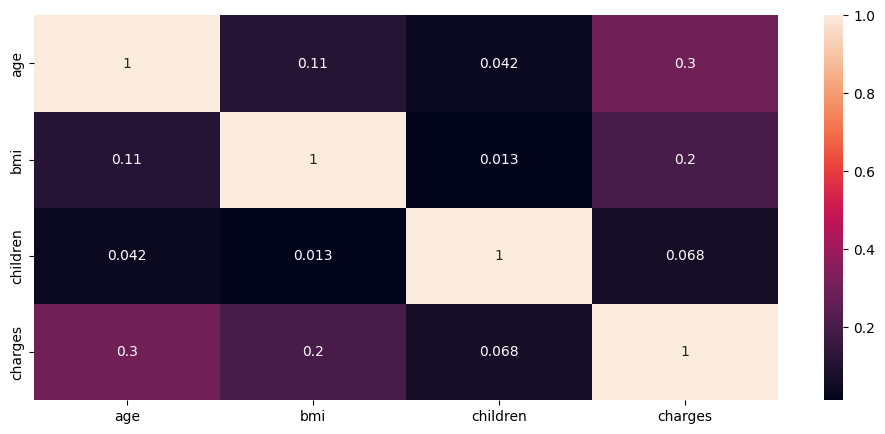

In [ ]:
#строим тепловую карту корреляций
numeric_data = temp_data.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()
fig = plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True)

### Подготовка данных

Произведем One Hot-кодирование категориальных признаков с помощью функции pandas - get_dummies().

In [ ]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


Выделим факторы и целевой признак в отдельные таблицы

Начинаем работу над моделью!

### Задание 1

Разделяем всю выборку на тренировочную и тестовую в соотношении 80/20.

In [ ]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Выводим размеры полученных выборок
print('Train shape: {}, {}'.format(X_train.shape,  y_train.shape))
print('Test shape: {}, {}'.format(X_test.shape, y_test.shape))

Train shape: (1070, 9), (1070,)
Test shape: (268, 9), (268,)


### Задание 2

Для удобства вывода создадим функцию print_metrics

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [ ]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выведем свободный член (intercept) обученной модели
print("w0:\t{:.3f}".format(lr.intercept_))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

w0:	-12390.804
Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Train MAPE: 46.888


### Задание 3

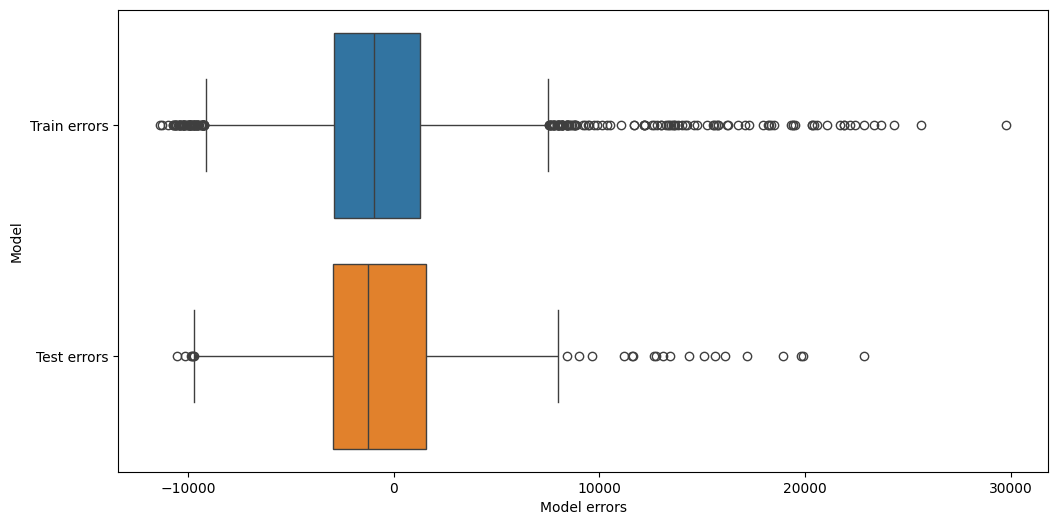

In [ ]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient="h", ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

А. Разброс на тестовой выборке больше, чем на тренировочной \
C. Медианная ошибка на тренировочной и тестовой выборках отрицательная (меньше 0).

### Задание 4

In [ ]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

print(len(X_train_scaled_poly))

Train shape: (1070, 54)
Test shape: (268, 54)
1070


### Задание 5

In [ ]:
# Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
# Обучаем модель по МНК
lr_model_poly.fit(X_train_scaled_poly, y_train)
# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_scaled_poly)
# Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2903.714
Train MAPE: 29.724


Test R^2: 0.866
Test MAE: 2744.572
Train MAPE: 30.572


### Задание 6

In [ ]:
print(np.round(lr_model_poly.coef_, 3))

[-8.13047559e+16  2.53222933e+14  1.35906410e+16 -2.70018612e+16
  3.31330832e+14  1.46523471e+15  1.05093258e+15  1.20907045e+15
  1.13655758e+15  8.38400000e+03  8.16000000e+02  9.44000000e+02
 -1.69200000e+03  1.68000000e+02  8.13047559e+16  8.13047559e+16
  8.13047559e+16  8.13047559e+16  1.24341579e+15  6.66000000e+02
 -1.26300000e+03  2.49000000e+02 -1.49663872e+15 -1.49663872e+15
 -1.49663872e+15 -1.49663872e+15 -9.71925000e+03  1.59600000e+03
  5.48352500e+04 -1.35906410e+16 -1.35906410e+16 -1.35906410e+16
 -1.35906410e+16 -2.10325000e+03 -2.24000000e+03  2.70018612e+16
  2.70018612e+16  2.70018612e+16  2.70018612e+16 -1.61696517e+14
 -1.69634315e+14 -1.69634315e+14 -1.69634315e+14 -1.69634315e+14
  9.28525306e+14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.34282743e+15  0.00000000e+00  0.00000000e+00  1.18468957e+15
  0.00000000e+00  1.25720243e+15]


### Задание 7

In [ ]:
# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
# Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
# Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2890.473
Train MAPE: 29.401


Test R^2: 0.867
Test MAE: 2719.334
Train MAPE: 30.070
